In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:

import numpy as np
import pandas as pd
df = pd.read_csv("../data/K9_MODIFIED_data_v2.csv")
df.shape
df = df.replace('?',np.NaN)
df = df.replace('inactive',0)
df = df.replace('active',1)
df = df.dropna(axis = 0, how = 'all')
df = df.fillna(df.mean())
df.shape

In [5]:
print(df.columns)

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
       ...
       'C5401', 'C5402', 'C5403', 'C5404', 'C5405', 'C5406', 'C5407', 'C5408',
       'C5409', 'C5410'],
      dtype='object', length=5410)


In [35]:
y=df['C5410']
print(y) 

0        0
1        0
2        0
3        0
4        0
        ..
31415    0
31416    0
31417    0
31418    0
31419    0
Name: C5410, Length: 31420, dtype: int64


In [36]:
gruop_df = df.groupby(by=["C5410"])

counts = gruop_df.size().to_frame(name='counts')
counts

,counts
C5410,
0,31269
1,151


In [37]:
df1 = df.iloc[: , 1:]
X = df1.loc[:, df1.columns != "C5410"]
X.head(10)

,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,...,C5400,C5401,C5402,C5403,C5404,C5405,C5406,C5407,C5408,C5409
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0,-0.015,...,-0.015,0.006,0.013,0.021,0.02,0.016,-0.011,0.003,0.01,-0.007
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0,-0.002,...,-0.007,0.002,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.169,-0.025,-0.01,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,-0.016,0.019,0.01,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.02,-0.019,...,-0.028,0.051,0.012,0.05,0.038,0.051,-0.015,0.017,0.027,-0.049
5,-0.154,0.005,-0.011,-0.013,-0.002,-0.115,0.005,0.002,-0.003,0.002,...,0.027,-0.011,0.012,0.009,0.003,-0.001,0.002,-0.006,0.009,0.013
6,-0.15,0.016,-0.014,0,0.016,-0.123,-0.004,-0.002,-0.005,0.01,...,0.015,0,-0.033,-0.032,0.029,-0.052,-0.029,-0.006,0.004,0.023
7,-0.158,0.002,-0.019,-0.028,-0.008,-0.101,0.011,0.005,0.001,0.003,...,0.036,0.015,-0.025,-0.003,0.017,-0.017,-0.009,-0.001,0.017,0.012
8,-0.152,0.009,-0.015,-0.008,0.004,-0.12,-0.002,-0.002,-0.007,0.004,...,-0.003,-0.014,-0.009,-0.007,0.009,-0.027,-0.012,-0.009,0.008,0.021
9,-0.172,-0.028,0.003,-0.045,-0.055,-0.078,0.039,0.011,0.006,-0.02,...,-0.061,0.016,0.031,-0.059,0.05,0.01,-0.005,0.137,0.098,-0.015


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [39]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()

In [42]:
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train, axis=0, keepdims=True))
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test, axis=0, keepdims=True))

In [ ]:
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [43]:
import gc
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDClassifier

estimator = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                          shuffle=True, verbose=0, epsilon=0.1, n_jobs=4, 
                          learning_rate='optimal', eta0=0.0, power_t=0.5, class_weight=None, warm_start=False, average=False)

mean_squared_error(y_test,estimator.fit(X_train,y_train).predict(X_test))


0.004918507088436687

In [47]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

pca = PCA(n_components=175)
X1 = X.fillna(0)

In [48]:
pca.fit(X1)
X_pca = pca.transform(X1)
X_pca.shape

(31420, 175)

In [50]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
clf = LassoCV()

sfm = SelectFromModel(clf)
sfm.fit(X1, y)
n_features = sfm.transform(X1)
n_features.shape

clf.fit(n_features,y)
clf.score(n_features, y)

/Users/kaniska/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016280841138808455, tolerance: 0.00886848742838955
  model = cd_fast.enet_coordinate_descent_gram(
/Users/kaniska/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013328055719647125, tolerance: 0.00886848742838955
  model = cd_fast.enet_coordinate_descent_gram(
/Users/kaniska/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019061230760037517, tolerance: 0.00886848742838955
  model = 

0.23925462826886779

In [51]:
from sklearn.pipeline import Pipeline

# fits PCA, transforms data and fits the decision tree classifier
# on the transformed data
pipe = Pipeline([('pca', PCA()),
                 ('tree', DecisionTreeClassifier())])

pipe.fit(X_pca, y)
pipe.predict(X_pca)

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
from sklearn.model_selection import learning_curve

In [59]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

#scoring = ['precision_macro', 'recall_macro']
#val_score_pca = cross_validate(pipe, X_pca, y)
#print(val_score_pca)

plot_learning_curve(LassoCV(), "Learning curve (LassoCV)", n_features, y, (0, 0.5), cv=5, n_jobs=4)
plt.show()


In [ ]:
#val_score_lasso = cross_validate(pipe, n_features, y, scoring=scoring)
#print(val_score_lasso)
#plot_learning_curve(clf, "Learning curve (PCA)", X_train_1, y_train_1, (0.95, 1.01), cv=5, n_jobs=4)
#plt.show()


In [64]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_pca, y, test_size=0.33, random_state=42)

clf_svm=svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
    probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

clf_svm.fit(X_train_1,y_train_1)

y_pred = clf_svm.predict(X_test_1)

cm = confusion_matrix(y_test_1, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)


[[10324     0]
 [   45     0]]


In [65]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[10324     0]
 [   45     0]]


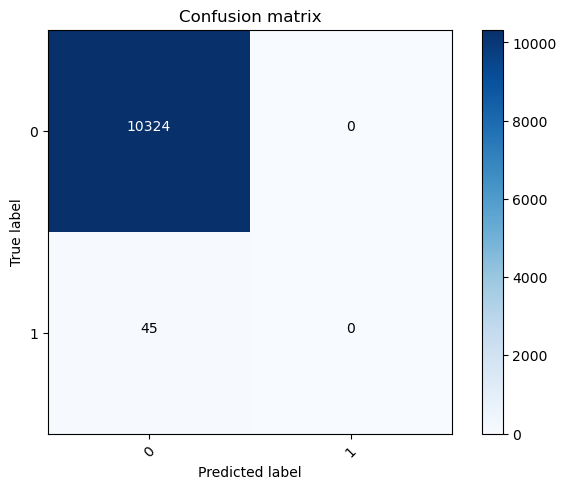

In [66]:
plot_confusion_matrix(cm,[0,1],normalize=False)

In [67]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_1,y_pred))

0.9956601408043205


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

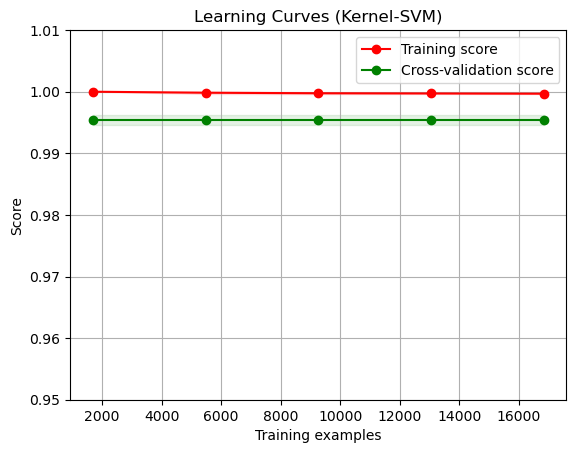

In [69]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
title = "Learning Curves (Kernel-SVM)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = clf_svm
plot_learning_curve(estimator, title, X_train_1, y_train_1, (0.95, 1.01), cv=cv, n_jobs=4)
plt.show()

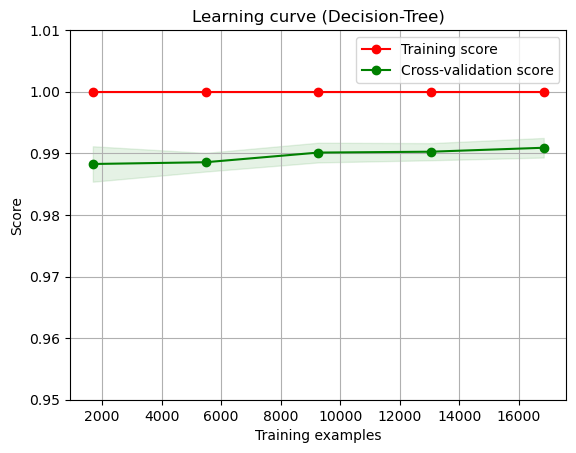

In [70]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state = 0)
clf = clf.fit(X_train_1, y_train_1)
y_pred = clf.predict_proba(X_test_1)

from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train_1, y_train_1, cv=10)

plot_learning_curve(clf, "Learning curve (Decision-Tree)", X_train_1, y_train_1, (0.95, 1.01), cv=cv, n_jobs=4)
plt.show()

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20

In [72]:
classifiers = [
    ("SGD", SGDClassifier()),
    ("ASGD", SGDClassifier(average=True)),
    ("Perceptron", Perceptron()),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss='hinge',
                                                         C=1.0)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge',
                                                          C=1.0)),
    ("SAG", LogisticRegression(solver='sag', tol=1e-1, C=1.e4 / X.shape[0]))
]

xx = 1. - np.array(heldout)

In [ ]:
for name, clf in classifiers:
    print("training %s" % name)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Accuracy Rate")
plt.show()

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [75]:
classifiers = [
    ("SGD", SGDClassifier()),
    ("ASGD", SGDClassifier(average=True)),
    ("Perceptron", Perceptron()),
    ("Passive-Aggressive I", PassiveAggressiveClassifier(loss='hinge',
                                                         C=1.0)),
    ("Passive-Aggressive II", PassiveAggressiveClassifier(loss='squared_hinge',
                                                          C=1.0)),
    ("Logistic Regression", LogisticRegression(solver='sag', tol=1e-1, C=1.e4 / X.shape[0]))
]

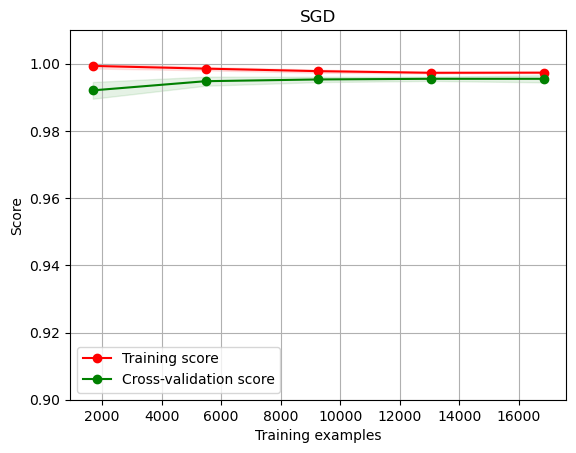

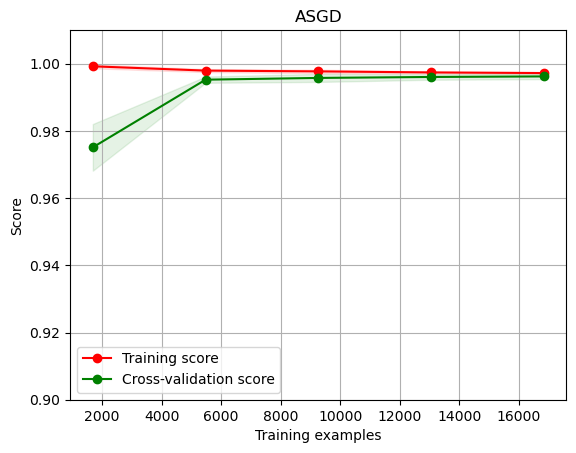

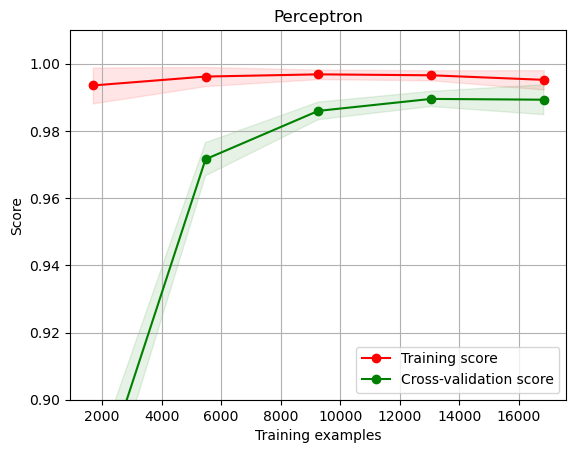

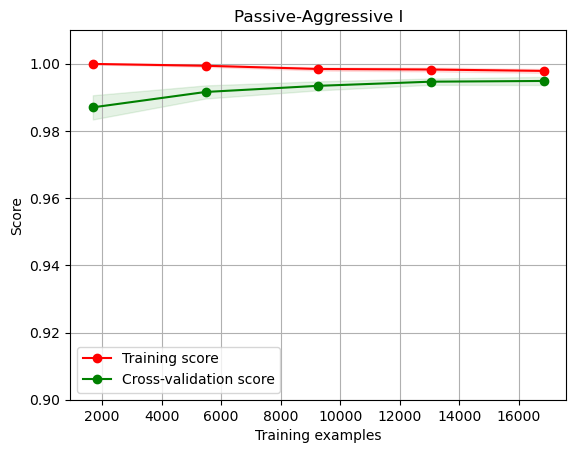

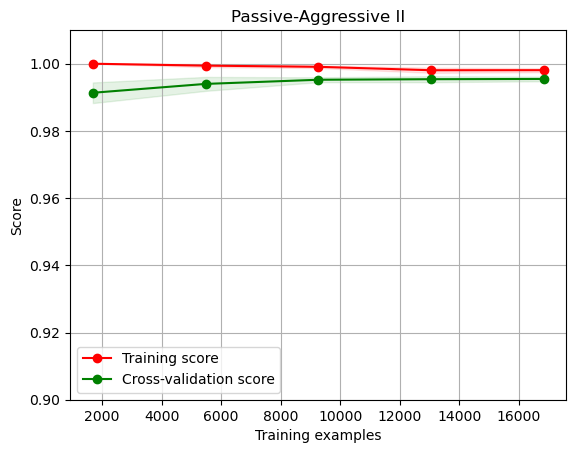

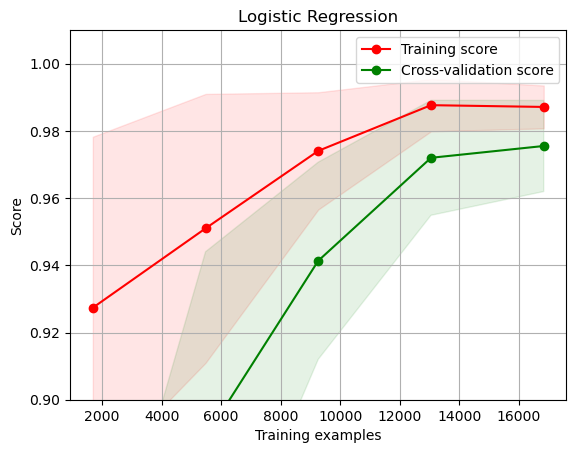

In [76]:
for name, clf in classifiers:
    title = name
# SVC is more expensive so we do a lower number of CV iterations:
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    estimator = clf
    plot_learning_curve(clf, title, X_train, y_train, (0.9, 1.01), cv=cv, n_jobs=4)

    plt.show()

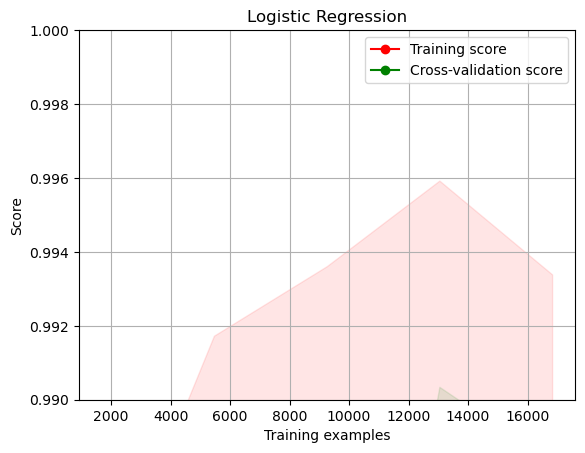

In [77]:
title = "Logistic Regression"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
clf=LogisticRegression(solver='sag', tol=1e-1, C=1.e4 / X.shape[0])
plot_learning_curve(clf, title, X_train, y_train, (0.99,1.00), cv=cv, n_jobs=4)

plt.show()
